In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

jkjmn

In [2]:
#importing dataset
df=pd.read_csv(r"C:\Users\MR MOSES\Desktop\data\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1. Data cleaning and preprocessing

In [3]:
#checking the sum of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#checking sum of duplicated values
df.duplicated().sum()

0

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

## Observation
We can observe that:
- There are no null values in the dataset
- No duplicates 
- The dataset has 768 rows and 9 columns

# 2. Exploratory Data Analysis (EDA) and Data visualization

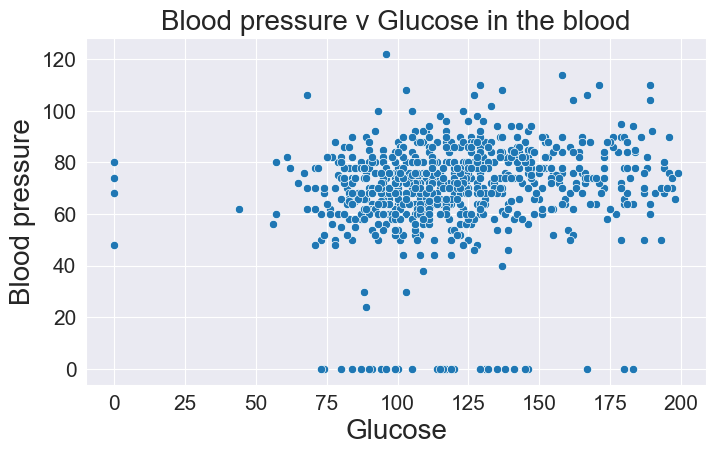

In [8]:
#Relationship between Glucose and Blood pressure
sns.set_style('darkgrid')
plt.figure(figsize=(8,4.5))
sns.scatterplot(data=df, x='Glucose', y='BloodPressure')
plt.title('Blood pressure v Glucose in the blood', fontsize=20)
plt.xlabel('Glucose', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Blood pressure', fontsize=20)
plt.yticks(fontsize=15)

plt.show()

## Observation
There's no clear relationship between blood pressure and the amount of glucose in the blood. More or less glucose in the blood does not cause an increase of decrease in blood pressure

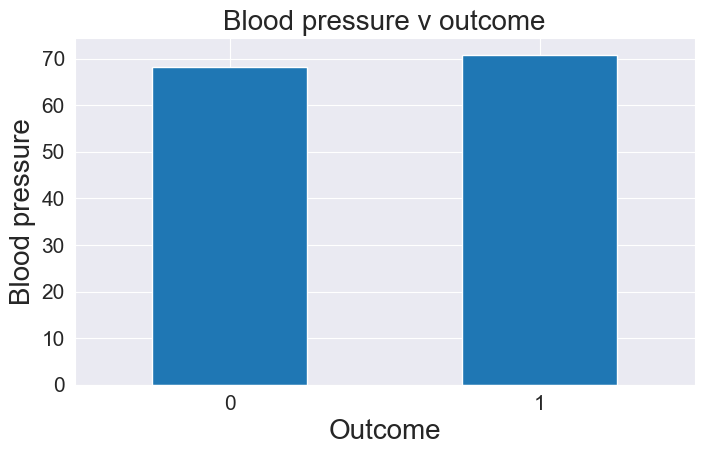

In [9]:
#How blood pressure relates to being a diabetic
plt.figure(figsize=(8,4.5))
df.groupby('Outcome')['BloodPressure'].mean().plot(x='Outcome', y='BloodPressure', kind='bar')
plt.title('Blood pressure v outcome', fontsize=20)
plt.xlabel('Outcome', fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Blood pressure', fontsize=20)
plt.yticks(fontsize=15, rotation=0)
plt.show()

## Observation 
Diabetic patients (1), have a slidely higher blood pressure than non diabetics (0)

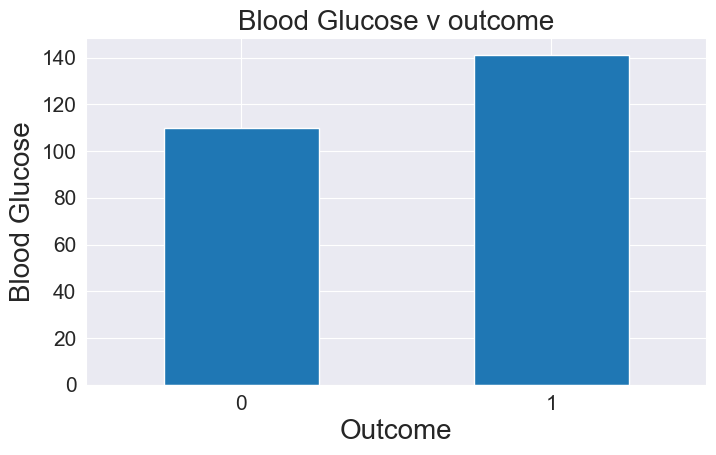

In [10]:
#How Glucose in the blood affect being a diabetic
plt.figure(figsize=(8,4.5))
df.groupby('Outcome')['Glucose'].mean().plot(x='Outcome', y='Glucose', kind='bar')
plt.title('Blood Glucose v outcome', fontsize=20)
plt.xlabel('Outcome', fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Blood Glucose', fontsize=20)
plt.yticks(fontsize=15, rotation=0)
plt.show()

## Observation 
Diabetic patients (1), have a higher amount of glucose in their blood than non diabetics (0)

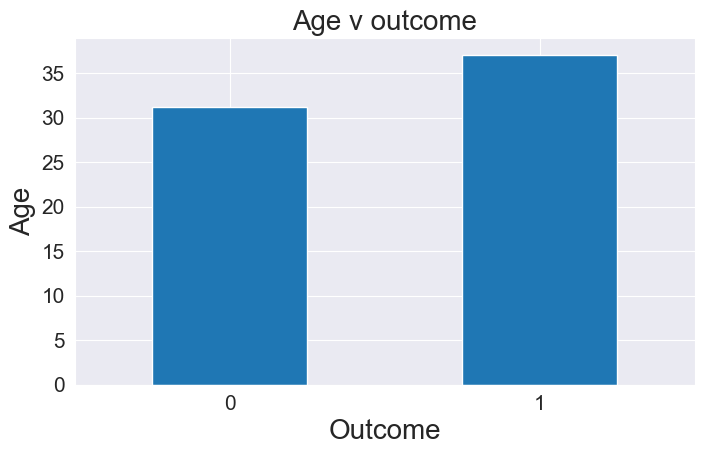

In [11]:
#Average age of diabetics
plt.figure(figsize=(8,4.5))
df.groupby('Outcome')['Age'].mean().plot(x='Outcome', y='Age', kind='bar')
plt.title('Age v outcome', fontsize=20)
plt.xlabel('Outcome', fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Age', fontsize=20)
plt.yticks(fontsize=15, rotation=0)
plt.show()

## Observation 
Diabetic patients (1) are likely be of the age 35 and above, while non diabetics (0) are likely to be 30 and below(). This is clearlt shown in the next 4 cells
- In the ThirtyfiveandAbove dataset, we can see that the amount of people who are 35 or older and have diabetes is higher (142) than the amount of people who are 35 or older and are diabetes free (138)
- Furthermore, in the BelowThirtyfive dataset, we observe that the amount of people who are aged below 35 with diabetes is 3 times less (126) than those without diabetes(362)

In [12]:
ThirtyfiveandAbove=df[df['Age']>=35]
ThirtyfiveandAbove_count=ThirtyfiveandAbove.groupby('Outcome')['Age'].count()
ThirtyfiveandAbove_count

Outcome
0    138
1    142
Name: Age, dtype: int64

In [13]:
BelowThirtyfive=df[df['Age']<35]
BelowThirtyfive_count=BelowThirtyfive.groupby('Outcome')['Age'].count()
BelowThirtyfive_count

Outcome
0    362
1    126
Name: Age, dtype: int64

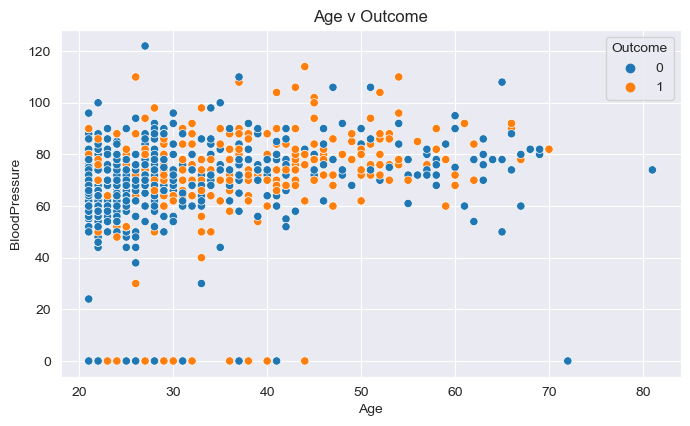

In [14]:
plt.figure(figsize=(8,4.5))
sns.scatterplot(y='BloodPressure', x='Age', hue='Outcome', data=df)
plt.title('Age v Outcome')
plt.show()

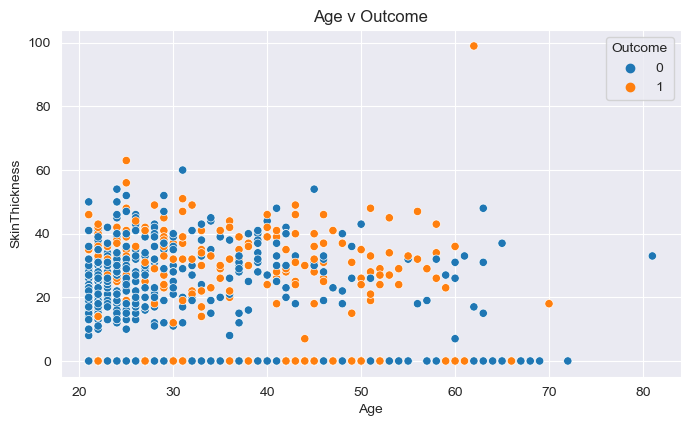

In [15]:
plt.figure(figsize=(8,4.5))
sns.scatterplot(y='SkinThickness',x='Age', hue='Outcome', data=df)
plt.title('Age v Outcome')
plt.show()

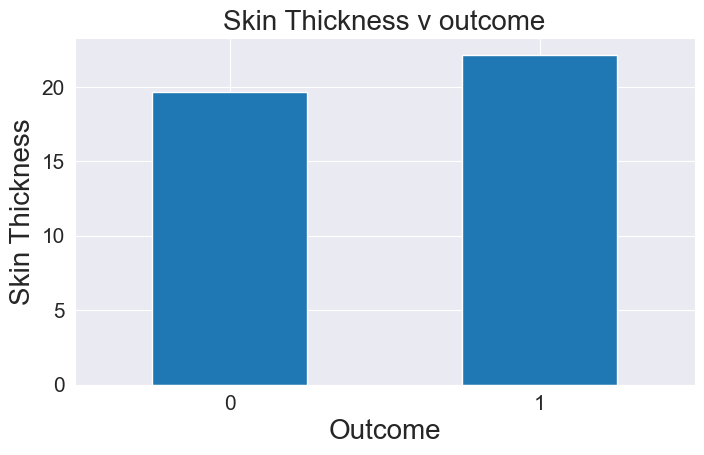

In [16]:
#Average age of diabetics
plt.figure(figsize=(8,4.5))
df.groupby('Outcome')['SkinThickness'].mean().plot(x='Outcome', y='SkinThickness', kind='bar')
plt.title('Skin Thickness v outcome', fontsize=20)
plt.xlabel('Outcome', fontsize=20)
plt.xticks(fontsize=15, rotation=0)
plt.ylabel('Skin Thickness', fontsize=20)
plt.yticks(fontsize=15, rotation=0)
plt.show()

<Axes: xlabel='Age', ylabel='DiabetesPedigreeFunction'>

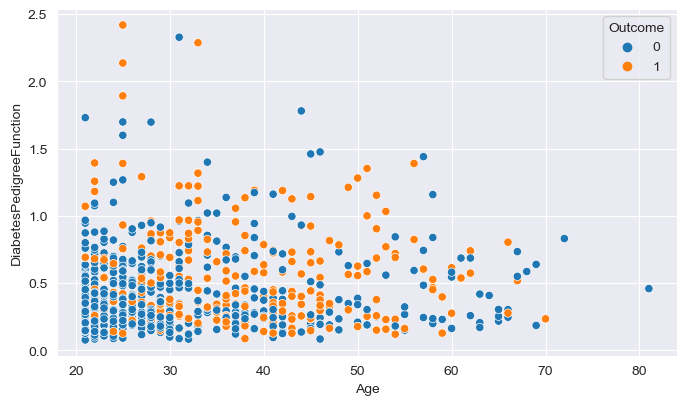

In [17]:
plt.figure(figsize=(8,4.5))
sns.scatterplot(x='Age', y='DiabetesPedigreeFunction', data=df, hue='Outcome')

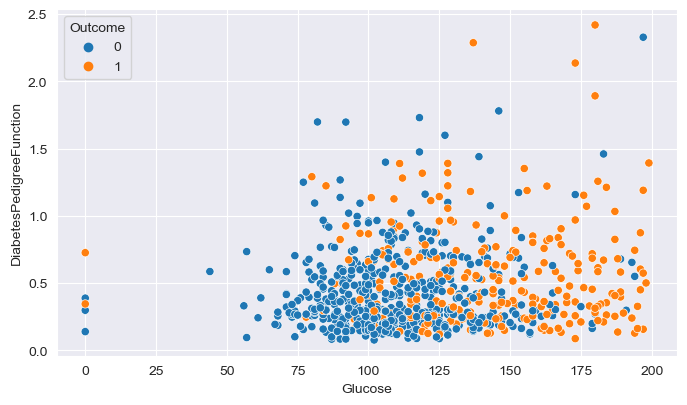

In [18]:
plt.figure(figsize=(8,4.5))
sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=df, hue='Outcome')
plt.show()

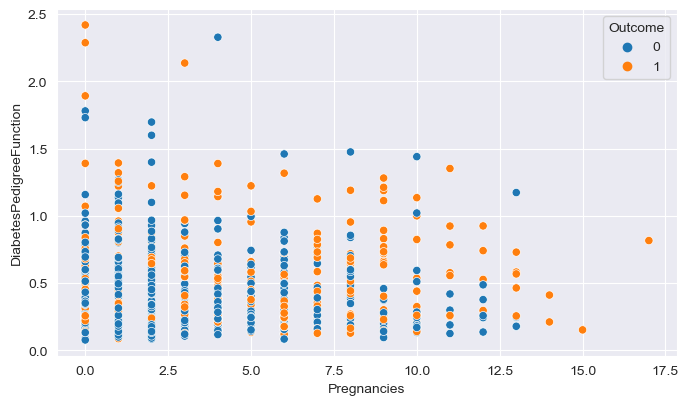

In [19]:
plt.figure(figsize=(8,4.5))
sns.scatterplot(x='Pregnancies', y='DiabetesPedigreeFunction', data=df, hue='Outcome')
plt.show()

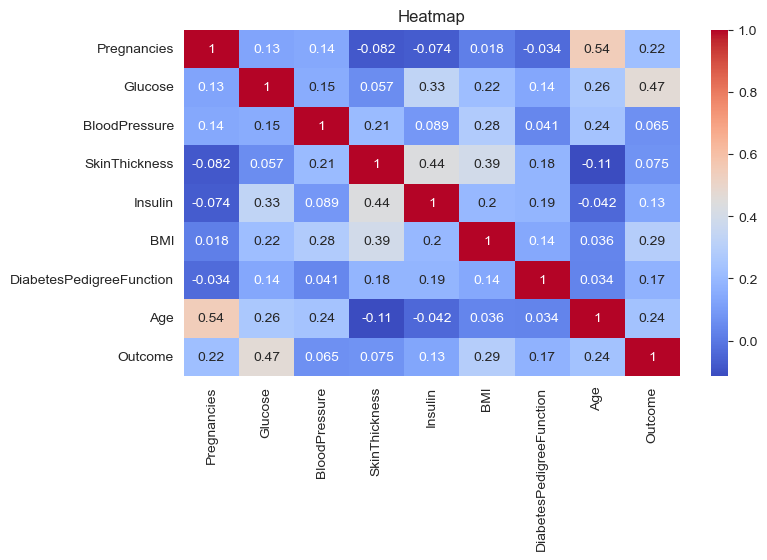

In [20]:
plt.figure(figsize=(8,4.5))
cor=df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

# 3. Feature Engineering

In [21]:
# Replacing zeros in the data with mean
cols=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies']
for i in cols:
    mean=df[i].mean()
    df[i]=df[i].replace(0, mean)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


## 3.1. Normalizing the dataset

In [22]:
#Separating features and target variables
X=df.drop('Outcome', axis=1)
y=df['Outcome']

In [23]:
#Initializing MInMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [24]:
#Normalizing X
X_norm=scaler.fit_transform(X)
df_norm=pd.DataFrame(X_norm, columns=X.columns)
df_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.312500,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333
1,0.000000,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667
2,0.437500,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333
3,0.000000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.177816,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [25]:
#Concatenating normalized features to the target
df_norm['Outcome']=y
df_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.312500,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1
1,0.000000,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0
2,0.437500,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1
3,0.000000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.177816,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


## 3.2. Feature selection

In [26]:
threshold=0.2
selected_features=cor[abs(cor['Outcome'])>threshold]
selected_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


From the result above, we can see that best columns to use as features after perfroming feature selection are Pregnancies, Glucose, BMI, and Age. In the cell below, we shall create a new dataset for these features only

In [34]:
#creating final feature dataframe
df_features=df_norm.drop(['SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'], axis=1)
df_features.head()

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,0.312500,0.670968,0.489796,0.314928,0.483333
1,0.000000,0.264516,0.428571,0.171779,0.166667
2,0.437500,0.896774,0.408163,0.104294,0.183333
3,0.000000,0.290323,0.428571,0.202454,0.000000
4,0.177816,0.600000,0.163265,0.509202,0.200000


In [48]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_features, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(537, 5)
(231, 5)


# 4. Machine learning model 
## 4.1. RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#create a randomforestclassifier
clf=RandomForestClassifier()

#training the model
clf.fit(X_train, y_train)

#Make Predictions using the test set
y_pred=clf.predict(X_test)

In [50]:
accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7402597402597403


The model has an accuracy score of 74.02% which is good. The accuracy can be increased through pruning, by increasing some parameters like n_estimators etc as shown below

In [53]:
#create a randomforestclassifier
clf=RandomForestClassifier(n_estimators=10000, max_depth=3, min_samples_split=10)

#training the model
clf.fit(X_train, y_train)

y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7619047619047619


## 4.2. DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#create a randomforestclassifier
clf=DecisionTreeClassifier()

#training the model
clf.fit(X_train, y_train)

#Make Predictions using the test set
y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7056277056277056


The accuracy of the can also be increased as shown below

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#create a randomforestclassifier
clf=DecisionTreeClassifier(max_depth=3, min_samples_split=10, min_samples_leaf=5)

#training the model
clf.fit(X_train, y_train)

#Make Predictions using the test set
y_pred=clf.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.7402597402597403


## Conclusion:

In this project, we aimed to develop a predictive model to determine whether a person has diabetes or not based on various features. We used the diabetes dataset, which contains information about individuals' medical measurements such as glucose levels, blood pressure, body mass index (BMI), and more.

After performing data exploration and preprocessing, we split the dataset into training and testing sets. We then trained a decision tree model and a random forest classifier to predict the presence or absence of diabetes.
The decision tree model achieved an accuracy of 0.74% on the testing data, while the random forest classifier achieved an accuracy of 76%. These results indicate that both models are able to make reasonably accurate predictions on unseen data.
Upon analysis, we found that the most important features for predicting diabetes were glucose levels, BMI, age, and insulin levels. These findings align with prior medical knowledge, as these factors are known to be significant indicators of diabetes risk.
By using the developed models, healthcare professionals can potentially identify individuals at risk of diabetes based on their medical measurements. Early detection and intervention can play a crucial role in managing and preventing the onset of diabetes-related complications.

It's important to note that while the developed models show promising results, they are not without limitations. The models rely solely on the provided medical measurements and do not consider other factors such as genetic predisposition or lifestyle choices, which can also impact the development of diabetes. Therefore, further research and validation are necessary before deploying the models in real-world healthcare settings.
In summary, this project demonstrates the potential of machine learning techniques, specifically decision trees and random forests, in predicting the presence or absence of diabetes based on medical measurements. The models provide a valuable tool for assisting healthcare professionals in identifying individuals at risk of diabetes and implementing appropriate preventive measures.